In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pypfopt as pf

In [41]:
from modules.Colher_tratar_dados.load_data import load_data

# Dados de Entrada
data_simulacao = datetime(2023,9,25)

[dict_df_acoes, df_Selic, df_Expectativa_Selic_mensal]\
      = load_data(data_simulacao)

In [42]:
from example.Estrategia_retorno import main_ret
info_main, info_verificao = main_ret(dict_df_acoes, df_Selic, df_Expectativa_Selic_mensal)
expec_retorno = info_main[0]
cotacoes = info_main[1]
setores = info_main[2]


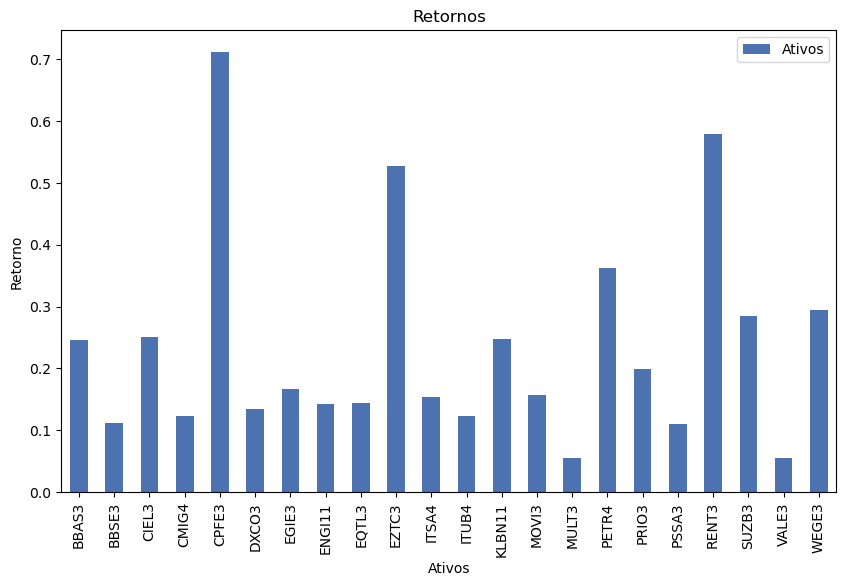

In [43]:
# Suponha que você tenha uma série chamada 'expec_retorno'
# Crie um DataFrame a partir da série para facilitar a plotagem
df = pd.DataFrame({'Ativos': expec_retorno})

# Crie um gráfico de barras
ax = df.plot(kind='bar', figsize=(10, 6), title='Retornos')

# Adicione rótulos aos eixos
ax.set_xlabel('Ativos')
ax.set_ylabel('Retorno')

# Exiba o gráfico
plt.show()

## Calculating the covariance matrix

<Axes: >

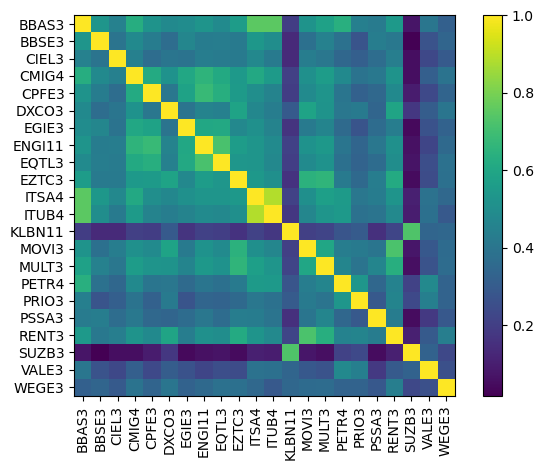

In [44]:
from pypfopt import risk_models, plotting, EfficientFrontier, objective_functions

S = risk_models.CovarianceShrinkage(cotacoes).ledoit_wolf()
plotting.plot_covariance(S, plot_correlation=True)

## Restrição por setores



In [45]:
unique_sectors = list(set(setores))  # Obtém os valores únicos usando set()
setores_dic = setores.to_dict()
# Criar 'sector_lower' com 0.1 para todos os setores únicos
sector_lower = {setor: 0.05 for setor in unique_sectors}

# Criar 'sector_upper' com 0.4 para todos os setores únicos
sector_upper = {setor: 0.4 for setor in unique_sectors}

In [46]:
mu = expec_retorno
S = risk_models.CovarianceShrinkage(cotacoes).ledoit_wolf()

ef = EfficientFrontier(mu, S, weight_bounds=(0, 0.1))  # weight_bounds automatically set to (0, 1)
ef.add_sector_constraints(setores_dic, sector_lower, sector_upper)

# ITUB4 valor igual ou de 10% de peso na carteira
index = ef.tickers.index("EQTL3")
ef.add_constraint(lambda w: w[index] >= 0.05)

ef.add_objective(objective_functions.L2_reg, gamma=0.1)  # gamma is the tuning parameter

ef.max_sharpe()
weights = ef.clean_weights()
weights


OrderedDict([('BBAS3', 0.01896),
             ('BBSE3', 0.02825),
             ('CIEL3', 0.02265),
             ('CMIG4', 0.0),
             ('CPFE3', 0.1),
             ('DXCO3', 0.0),
             ('EGIE3', 0.1),
             ('ENGI11', 0.0),
             ('EQTL3', 0.05),
             ('EZTC3', 0.1),
             ('ITSA4', 0.0),
             ('ITUB4', 0.0),
             ('KLBN11', 0.1),
             ('MOVI3', 0.0),
             ('MULT3', 0.0),
             ('PETR4', 0.1),
             ('PRIO3', 0.0),
             ('PSSA3', 0.03007),
             ('RENT3', 0.1),
             ('SUZB3', 0.1),
             ('VALE3', 0.05),
             ('WEGE3', 0.1)])

In [47]:
ef.portfolio_performance(verbose=True);

Expected annual return: 34.4%
Annual volatility: 25.1%
Sharpe Ratio: 1.29


## Apresentação dos resultados

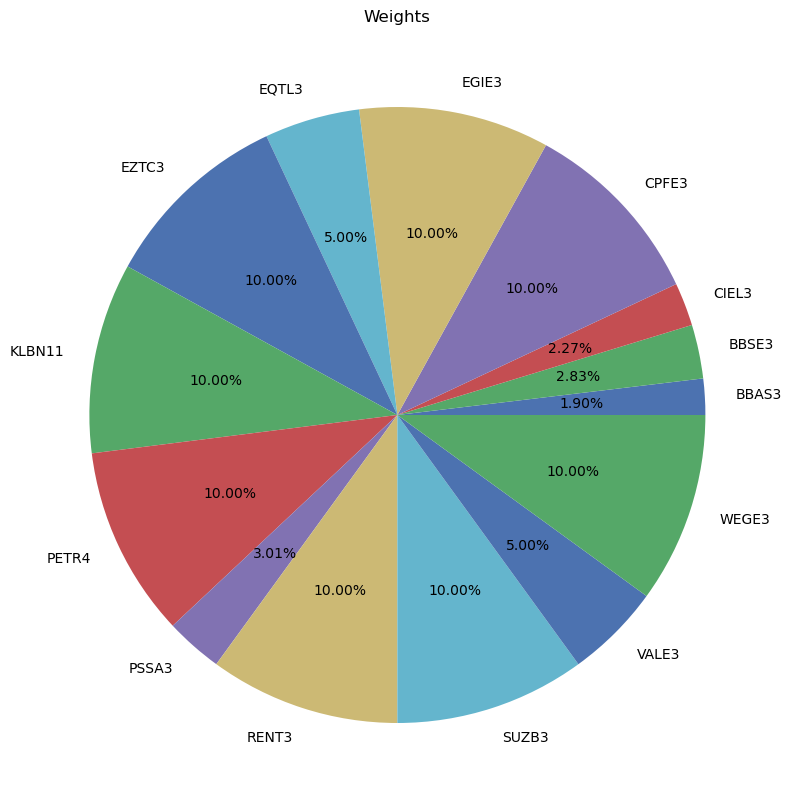

In [48]:
from collections import OrderedDict
# Crie um novo OrderedDict excluindo os itens com valores nulos
weights_sem_nulos = OrderedDict((chave, valor) for chave, valor in weights.items() if valor != 0.0)
pd.Series(weights_sem_nulos).plot.pie(figsize=(10,10), title='Weights', autopct='%.2f%%');

In [49]:
info_verificao[0]

,Setor,Retorno_anual_esperado,ROE,Multiplo_Divida,DY_medio,CAGR_Medio,Expansao_Multiplo,Multiplo_atual,Multiplo_medio,Desvio_multiplo
B3SA3,Bancos e Serviços Financeiros,0.040462,0.200871,-0.439998,0.050425,0.050523,1,17.052252,30.462573,-0.333078
BBAS3,Bancos e Serviços Financeiros,0.245617,0.194639,-1.585154,0.067667,0.265346,1,4.071373,6.648187,-0.993326
BBDC3,Bancos e Serviços Financeiros,0.0,0.097406,-9.696191,0.067669,-0.111799,1,8.142212,9.828057,-0.639056
BBDC4,Bancos e Serviços Financeiros,0.0,0.097406,-9.696191,0.065637,-0.111799,1,9.227841,10.814294,-0.557818
BBSE3,Bancos e Serviços Financeiros,0.112326,0.803219,-1.102747,0.066144,0.23257,1.126822,8.902621,12.482958,-1.460594
BPAC11,Bancos e Serviços Financeiros,0.03526,0.179546,-0.310929,0.014508,0.05891,1,14.04283,18.106251,-0.543064
CIEL3,Bancos e Serviços Financeiros,0.251058,0.156093,1.480833,0.072636,0.329271,1.71865,3.983144,12.037277,-1.551364
CMIG4,Energia e Serviços Básicos,0.1226,0.221579,1.00118,0.0727,0.046518,1,4.518458,6.460296,-0.976697
CPFE3,Energia e Serviços Básicos,0.711555,0.298672,1.535348,0.086734,0.246431,1.26357,4.785827,8.164058,-1.595893
CPLE6,Energia e Serviços Básicos,0,0.08837,2.721261,0.078784,-0.036877,0.785119,8.441458,5.964412,1.86768
